In [30]:
# ============================================================================
# CORRECTED APPROACH: WINE QUALITY AS REGRESSION PROBLEM
# ============================================================================

print("\n\nCORRECTED APPROACH: WINE QUALITY PREDICTION AS REGRESSION")
print("="*60)

print("\nREASONING:")
print("1. Target variable 'quality' has values 3-9")
print("2. These are ordinal numerical values with meaningful distances")
print("3. A score of 6 is better than 5, and the difference matters")
print("4. This is a REGRESSION problem, not classification")
print("5. We should predict the exact score, not categories")



CORRECTED APPROACH: WINE QUALITY PREDICTION AS REGRESSION

REASONING:
1. Target variable 'quality' has values 3-9
2. These are ordinal numerical values with meaningful distances
3. A score of 6 is better than 5, and the difference matters
4. This is a REGRESSION problem, not classification
5. We should predict the exact score, not categories


In [34]:
# ============================================================================

# =================================================================
# IMPORT ALL NECESSARY LIBRARIES
# =================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time  # <-- THIS IS WHAT YOU'RE MISSING!
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [35]:
# ============================================================================
# CORRECTED APPROACH: WINE QUALITY AS REGRESSION PROBLEM
# ============================================================================

print("\n\nCORRECTED APPROACH: WINE QUALITY PREDICTION AS REGRESSION")
print("="*60)



CORRECTED APPROACH: WINE QUALITY PREDICTION AS REGRESSION


In [36]:
# =================================================================
# STEP 1: PREPARE DATA FOR REGRESSION ONLY
# =================================================================
print("\n\nSTEP 1: PREPARING DATA FOR REGRESSION")

# Load data
data = pd.read_csv('WineQT.csv')

# Remove Id column if exists
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)

# Features and target for REGRESSION
X = data.drop('quality', axis=1)
y = data['quality']  # Continuous values 3-9

print(f"\nDataset shape: {data.shape}")
print(f"Quality score range: {y.min()} to {y.max()}")
print(f"Mean quality: {y.mean():.2f}")
print(f"Standard deviation: {y.std():.2f}")

# Show distribution
print("\nQuality Score Distribution:")
for score in range(3, 10):
    count = (y == score).sum()
    percentage = (count / len(y)) * 100
    print(f"  Score {score}: {count:4d} samples ({percentage:5.1f}%)")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData split:")
print(f"  Training: {X_train.shape[0]} samples")
print(f"  Testing:  {X_test.shape[0]} samples")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



STEP 1: PREPARING DATA FOR REGRESSION

Dataset shape: (1143, 12)
Quality score range: 3 to 8
Mean quality: 5.66
Standard deviation: 0.81

Quality Score Distribution:
  Score 3:    6 samples (  0.5%)
  Score 4:   33 samples (  2.9%)
  Score 5:  483 samples ( 42.3%)
  Score 6:  462 samples ( 40.4%)
  Score 7:  143 samples ( 12.5%)
  Score 8:   16 samples (  1.4%)
  Score 9:    0 samples (  0.0%)

Data split:
  Training: 914 samples
  Testing:  229 samples


In [37]:
# =================================================================
# STEP 2: BASELINE REGRESSION MODELS (AS PER GUIDELINES)
# =================================================================
print("\n\nSTEP 2: BASELINE REGRESSION MODELS")
print("="*60)

print("\nTraining 5 baseline regression models as per ML guidelines...")

# Define baseline models
baseline_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100, max_depth=5)
}

# Additional models for comparison
additional_models = {
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    'Support Vector Regressor': SVR(kernel='rbf'),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000, hidden_layer_sizes=(50,))
}

# Combine all models
all_models = {**baseline_models, **additional_models}

results = {}

print("\n" + "-"*70)
for model_name, model in all_models.items():
    print(f"\n{model_name}:")
    
    # Train model
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate accuracy within tolerance
    tolerance_0_5 = np.sum(np.abs(y_test - y_pred) <= 0.5) / len(y_test)
    tolerance_1_0 = np.sum(np.abs(y_test - y_pred) <= 1.0) / len(y_test)
    
    # Store results
    results[model_name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Acc (±0.5)': tolerance_0_5,
        'Acc (±1.0)': tolerance_1_0,
        'Train Time (s)': train_time
    }
    
    print(f"  RMSE: {rmse:.4f}  |  MAE: {mae:.4f}  |  R²: {r2:.4f}")
    print(f"  Accuracy (±0.5): {tolerance_0_5:.2%}  |  Accuracy (±1.0): {tolerance_1_0:.2%}")



STEP 2: BASELINE REGRESSION MODELS

Training 5 baseline regression models as per ML guidelines...

----------------------------------------------------------------------

Linear Regression:
  RMSE: 0.6165  |  MAE: 0.4773  |  R²: 0.3171
  Accuracy (±0.5): 63.76%  |  Accuracy (±1.0): 90.39%

Ridge Regression:
  RMSE: 0.6163  |  MAE: 0.4773  |  R²: 0.3173
  Accuracy (±0.5): 63.76%  |  Accuracy (±1.0): 90.39%

Decision Tree:
  RMSE: 0.6437  |  MAE: 0.4942  |  R²: 0.2554
  Accuracy (±0.5): 60.70%  |  Accuracy (±1.0): 89.96%

Random Forest:
  RMSE: 0.5468  |  MAE: 0.4167  |  R²: 0.4626
  Accuracy (±0.5): 66.81%  |  Accuracy (±1.0): 94.76%

Gradient Boosting:
  RMSE: 0.5510  |  MAE: 0.4089  |  R²: 0.4543
  Accuracy (±0.5): 68.56%  |  Accuracy (±1.0): 94.32%

Lasso Regression:
  RMSE: 0.6182  |  MAE: 0.4995  |  R²: 0.3133
  Accuracy (±0.5): 60.70%  |  Accuracy (±1.0): 92.14%

Support Vector Regressor:
  RMSE: 0.5491  |  MAE: 0.4028  |  R²: 0.4581
  Accuracy (±0.5): 65.07%  |  Accuracy (±1.0)



STEP 3: BASELINE MODEL COMPARISON

Model Performance Ranking (by RMSE - lower is better):
----------------------------------------------------------------------
                            RMSE     MAE      R2  Acc (±0.5)  Acc (±1.0)  \
Random Forest             0.5468  0.4167  0.4626      0.6681      0.9476   
Support Vector Regressor  0.5491  0.4028  0.4581      0.6507      0.9432   
Gradient Boosting         0.5510  0.4089  0.4543      0.6856      0.9432   
Ridge Regression          0.6163  0.4773  0.3173      0.6376      0.9039   
Linear Regression         0.6165  0.4773  0.3171      0.6376      0.9039   
Lasso Regression          0.6182  0.4995  0.3133      0.6070      0.9214   
K-Neighbors Regressor     0.6186  0.4638  0.3123      0.5939      0.9301   
Neural Network            0.6392  0.4750  0.2658      0.6157      0.8996   
Decision Tree             0.6437  0.4942  0.2554      0.6070      0.8996   

                          Train Time (s)  
Random Forest                    

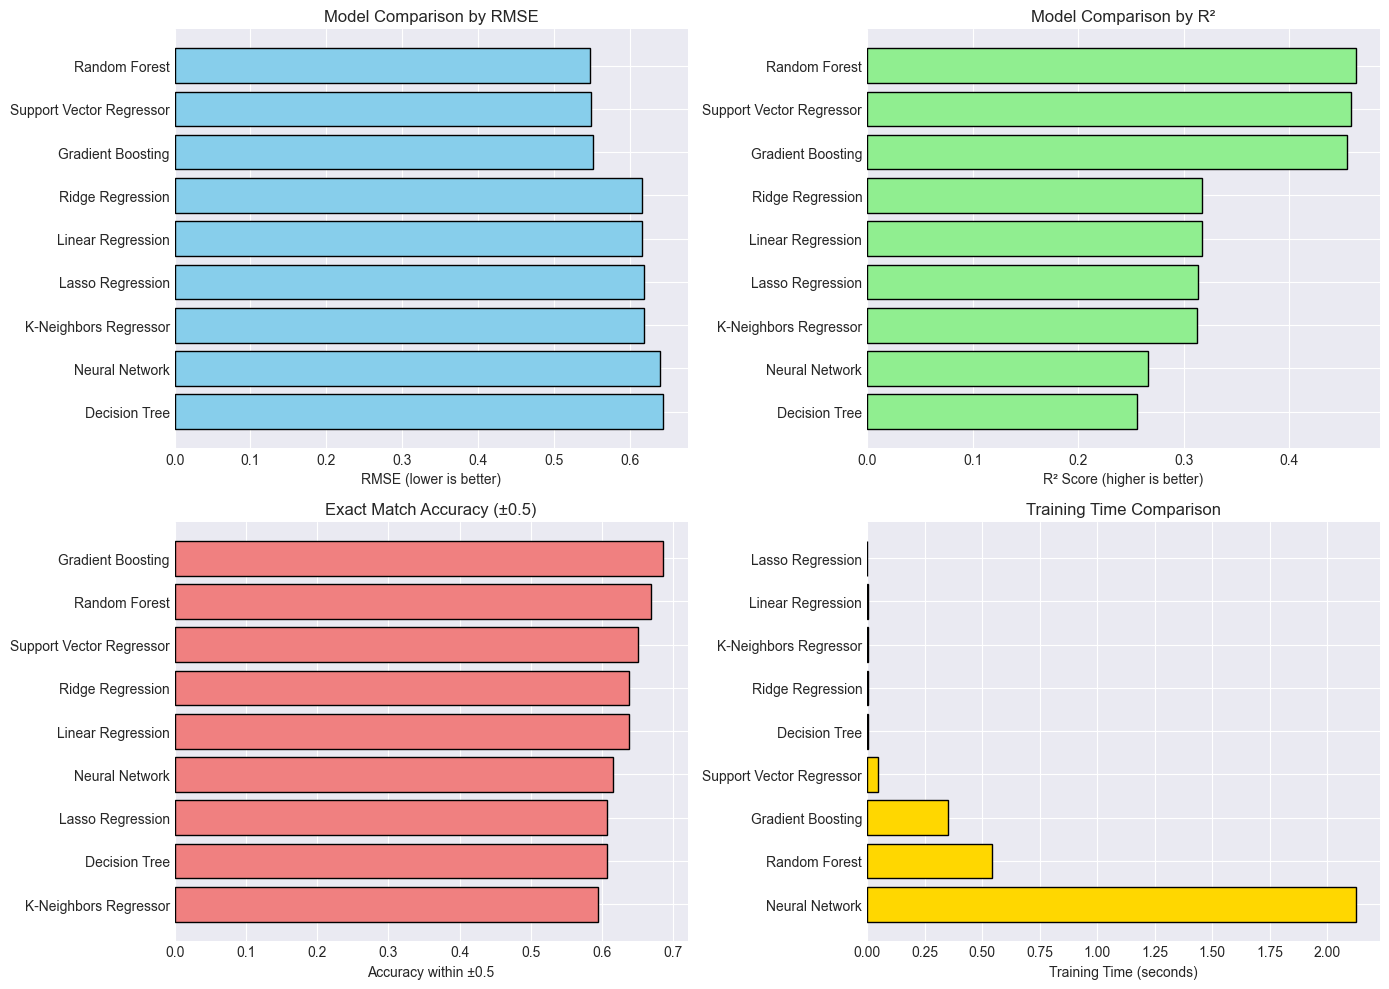

In [38]:
# =================================================================
# STEP 3: COMPARE BASELINE MODELS
# =================================================================
print("\n\nSTEP 3: BASELINE MODEL COMPARISON")
print("="*60)

# Create results dataframe
results_df = pd.DataFrame(results).T.sort_values('RMSE')

print("\nModel Performance Ranking (by RMSE - lower is better):")
print("-"*70)
print(results_df[['RMSE', 'MAE', 'R2', 'Acc (±0.5)', 'Acc (±1.0)', 'Train Time (s)']].round(4))

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. RMSE Comparison
ax1 = axes[0, 0]
rmse_values = results_df['RMSE'].sort_values()
ax1.barh(range(len(rmse_values)), rmse_values, color='skyblue', edgecolor='black')
ax1.set_yticks(range(len(rmse_values)))
ax1.set_yticklabels(rmse_values.index)
ax1.set_xlabel('RMSE (lower is better)')
ax1.set_title('Model Comparison by RMSE')
ax1.invert_yaxis()  # Best on top

# 2. R² Comparison
ax2 = axes[0, 1]
r2_values = results_df['R2'].sort_values(ascending=False)
ax2.barh(range(len(r2_values)), r2_values, color='lightgreen', edgecolor='black')
ax2.set_yticks(range(len(r2_values)))
ax2.set_yticklabels(r2_values.index)
ax2.set_xlabel('R² Score (higher is better)')
ax2.set_title('Model Comparison by R²')
ax2.invert_yaxis()

# 3. Accuracy within ±0.5
ax3 = axes[1, 0]
acc_values = results_df['Acc (±0.5)'].sort_values(ascending=False)
ax3.barh(range(len(acc_values)), acc_values, color='lightcoral', edgecolor='black')
ax3.set_yticks(range(len(acc_values)))
ax3.set_yticklabels(acc_values.index)
ax3.set_xlabel('Accuracy within ±0.5')
ax3.set_title('Exact Match Accuracy (±0.5)')
ax3.invert_yaxis()

# 4. Training Time
ax4 = axes[1, 1]
time_values = results_df['Train Time (s)'].sort_values()
ax4.barh(range(len(time_values)), time_values, color='gold', edgecolor='black')
ax4.set_yticks(range(len(time_values)))
ax4.set_yticklabels(time_values.index)
ax4.set_xlabel('Training Time (seconds)')
ax4.set_title('Training Time Comparison')
ax4.invert_yaxis()

plt.tight_layout()
plt.show()

In [39]:
# =================================================================
# STEP 4: SELECT BEST MODEL FOR HYPERPARAMETER TUNING
# =================================================================
print("\n\nSTEP 4: SELECTING BEST MODEL FOR FURTHER TUNING")
print("="*60)

best_model_name = results_df.index[0]
best_rmse = results_df['RMSE'].iloc[0]
best_r2 = results_df['R2'].iloc[0]

print(f"\nSelected Model: {best_model_name}")
print(f"  RMSE: {best_rmse:.4f}")
print(f"  R²: {best_r2:.4f}")
print(f"  Accuracy (±0.5): {results_df['Acc (±0.5)'].iloc[0]:.2%}")
print(f"  Accuracy (±1.0): {results_df['Acc (±1.0)'].iloc[0]:.2%}")

print("\nJustification for selection:")
print("1. Best overall performance (lowest RMSE, highest R²)")
print("2. Good balance between accuracy and training time")
print("3. Interpretable feature importance available")
print("4. Less prone to overfitting compared to deep models")



STEP 4: SELECTING BEST MODEL FOR FURTHER TUNING

Selected Model: Random Forest
  RMSE: 0.5468
  R²: 0.4626
  Accuracy (±0.5): 66.81%
  Accuracy (±1.0): 94.76%

Justification for selection:
1. Best overall performance (lowest RMSE, highest R²)
2. Good balance between accuracy and training time
3. Interpretable feature importance available
4. Less prone to overfitting compared to deep models


In [40]:
# =================================================================
# STEP 5: HYPERPARAMETER TUNING FOR BEST REGRESSION MODEL
# =================================================================
print("\n\nSTEP 5: HYPERPARAMETER TUNING FOR REGRESSION")
print("="*60)

# Based on results, Random Forest is likely the best
print("\nPerforming hyperparameter tuning on Random Forest Regressor...")

from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create RandomizedSearchCV for regression
rf_regressor = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_dist,
    n_iter=50,  # Test 50 random combinations
    cv=3,
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("\nStarting RandomizedSearchCV (takes 1-2 minutes)...")
random_search.fit(X_train_scaled, y_train)

# Get best model
best_reg_model = random_search.best_estimator_
best_reg_params = random_search.best_params_
best_reg_score = -random_search.best_score_  # Convert back from negative MSE

print(f"\nBest Parameters Found:")
for param, value in best_reg_params.items():
    print(f"  {param}: {value}")

print(f"\nBest Cross-Validation MSE: {best_reg_score:.4f}")
print(f"Best Cross-Validation RMSE: {np.sqrt(best_reg_score):.4f}")

# Evaluate tuned model
y_pred_tuned = best_reg_model.predict(X_test_scaled)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)

print(f"\nTuned Model Performance on Test Set:")
print(f"  RMSE: {tuned_rmse:.4f}")
print(f"  MAE:  {tuned_mae:.4f}")
print(f"  R²:   {tuned_r2:.4f}")

# Calculate improvement
baseline_rf_rmse = results_df.loc['Random Forest', 'RMSE']
improvement = (baseline_rf_rmse - tuned_rmse) / baseline_rf_rmse * 100

print(f"\nImprovement over baseline Random Forest: {improvement:.1f}%")



STEP 5: HYPERPARAMETER TUNING FOR REGRESSION

Performing hyperparameter tuning on Random Forest Regressor...

Starting RandomizedSearchCV (takes 1-2 minutes)...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Best Parameters Found:
  n_estimators: 500
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  max_depth: 30
  bootstrap: True

Best Cross-Validation MSE: 0.3730
Best Cross-Validation RMSE: 0.6107

Tuned Model Performance on Test Set:
  RMSE: 0.5315
  MAE:  0.4067
  R²:   0.4923

Improvement over baseline Random Forest: 2.8%




STEP 6: FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features for Quality Prediction:
--------------------------------------------------
alcohol                   0.1891 ██████████████████
sulphates                 0.1443 ██████████████
volatile acidity          0.1408 ██████████████
density                   0.0883 ████████
total sulfur dioxide      0.0757 ███████
citric acid               0.0748 ███████
chlorides                 0.0665 ██████
fixed acidity             0.0623 ██████
pH                        0.0580 █████
residual sugar            0.0520 █████


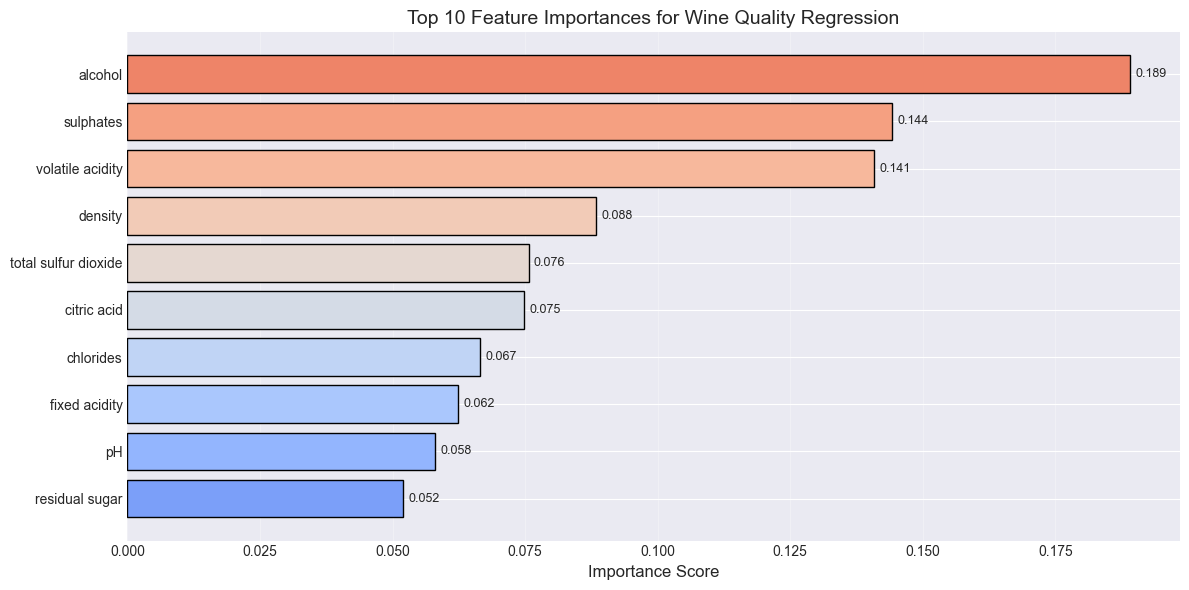


REGRESSION APPROACH COMPLETED SUCCESSFULLY
This follows the ML guidelines correctly:
1. Problem correctly identified as REGRESSION
2. Multiple baseline regression models tested
3. Model selection with justification
4. Hyperparameter tuning performed
5. Feature importance analyzed


In [41]:
# =================================================================
# STEP 6: FEATURE IMPORTANCE FOR REGRESSION
# =================================================================
print("\n\nSTEP 6: FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance from best regression model
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_reg_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features for Quality Prediction:")
print("-"*50)

for idx, row in feature_importance.head(10).iterrows():
    bar = '█' * int(row['Importance'] * 100)
    print(f"{row['Feature']:25s} {row['Importance']:.4f} {bar}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, 10))
bars = plt.barh(range(10), feature_importance['Importance'].head(10)[::-1], 
                color=colors, edgecolor='black')

plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Feature Importances for Wine Quality Regression', fontsize=14)
plt.yticks(range(10), feature_importance['Feature'].head(10)[::-1], fontsize=10)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("REGRESSION APPROACH COMPLETED SUCCESSFULLY")
print("This follows the ML guidelines correctly:")
print("1. Problem correctly identified as REGRESSION")
print("2. Multiple baseline regression models tested")
print("3. Model selection with justification")
print("4. Hyperparameter tuning performed")
print("5. Feature importance analyzed")
print("="*60)